In [1]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
import time

p = pyaudio.PyAudio()

volume = 0.5

samplingRate = 44100  # Hertz
base_frekvens = 110 # Hertz
duration= 1 #sekunder

tid=np.linspace(0,duration,samplingRate*duration)
firkantApprox=np.zeros(len(tid))

frekvenser=[]
frekvensAmplitude=[]

antall=0
while(True):
    n=2*antall+1 # Firkantbølgen er en odd funksjon
    antall+=1

    frekvens=n*base_frekvens
    frekvenser.append(frekvens)
    frekvensAmplitude.append(4/(np.pi * n))

    if 2*frekvens>samplingRate: # Nyquists samplingteorem
        break
    
    bolge = 4/(np.pi * n)*np.sin(2*np.pi*frekvens*tid)

    firkantApprox+=bolge

print("Antall bølger: "+str(antall))

firkantBolge=np.sign(np.sin(2*np.pi*tid*base_frekvens))

stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=samplingRate,
                output=True)

audioApprox = (volume * firkantApprox).astype(np.float32).tobytes()
audioFaktisk = (volume * firkantBolge).astype(np.float32).tobytes()

stream.write(audioApprox) #Spiller av fourierapproksimasjonen
time.sleep(1)
stream.write(audioFaktisk) #Spiller av en ekte firkantbølge

stream.stop_stream()
stream.close()
p.terminate()

Antall bølger: 101


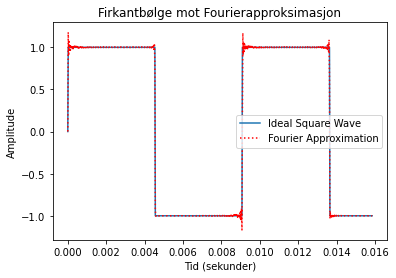

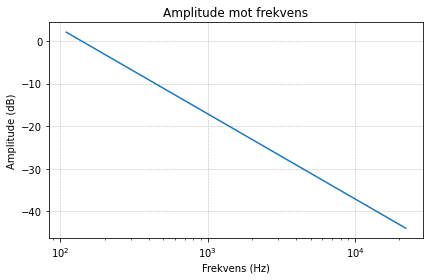

In [5]:

samplesAntall = 700

plt.figure(figsize=(6, 4))
plt.plot(tid[0:samplesAntall], firkantBolge[0:samplesAntall], label="Ideal Square Wave")
plt.plot(tid[0:samplesAntall], firkantApprox[0:samplesAntall], linestyle="dotted", color="red", label="Fourier Approximation")

plt.title("Firkantbølge mot Fourierapproksimasjon")
plt.xlabel("Tid (sekunder)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

frekvensAmplitude_dB = 20 * np.log10(np.maximum(frekvensAmplitude, 1e-12))

plt.title("Amplitude mot frekvens")
plt.xlabel("Frekvens (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.plot(frekvenser,frekvensAmplitude_dB)
plt.show()